MLT-Lab-CSE6024_Lab-Assignment-4: Logistic Regression and Naive Bayes Classifier Implementataion on Titanic Dataset

Submitted By: 20MAI0001 - NIHARIKA MAITRA

Git Repo link :

In [459]:
#1 To Import the required Libraries and Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [460]:
#2 To Read the dataset onto a variable (DataFrame) using Pandas

train = pd.read_csv("titanic_data.csv") #titanic_data.csv
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [461]:
#3 Fix the Predictor(Input Features(X)---->'Pclass', 'Sex', 'Age', 'Fare' in the dataset) and 
#Response(Classification Class/ Target Variable--->'Survived') Variables

#particular attributes/Features selected from the Input dataset to be stored in a dataframe inorder to 
#perform Binary Classification based on the characteristics of those attibutes/features

df = train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']] 
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [462]:
#4 Change male to 1 and female to 0 - Implementing Encoding

#Using the Single Line / Inline Function Lambda Function 
#We need to name the function and call it with a one line Logic

df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=="male" else 0)
df["Sex"]

<ipython-input-462-182c08d9d272>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Sex"] = df["Sex"].apply(lambda sex:1 if sex=="male" else 0)


0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [463]:
#To view detailed information of the different Data Types of the variables present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 34.9 KB


To check and give the count of missing values present for each of the Input Features ('Pclass', 'Sex', 'Age', 'Fare', 'Survived') of the dataframe 

In [464]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

To check and give the count of missing values present for the Input Features 'Age' and 'Fare' in the dataframe

In [465]:
#To check and give the count of missing values present for the Input feature 'Age' 
df["Age"].isnull().sum()

177

In [466]:
df["Age"].isna().sum()

177

In [467]:
#To check and give the count of missing values present for the Input feature 'Fare' 
df["Fare"].isnull().sum()

0

In [468]:
df["Age"].isna().sum()

177

In [469]:
#5 Handling Missing Values - Data Imputation

#Using fillna where na--->(Not a Number), to fill all those values of the Input Feature 'Age' 
#where there are missing values, with the Median Value, calculated by using all the 
#possible values present for the Input Feature 'Age'  

#There is a chance of generation of a good number of Outliers, if Mean value is used instead of Median value to 
#to fill all those values of the Input Feature 'Age' where there are missing values

df["Age"] = df["Age"].fillna(df["Age"].median()) 


<ipython-input-469-28150498fec0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = df["Age"].fillna(df["Age"].median())


In [470]:
#6 To Take a look at the Dataframe
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [471]:
#7 To Set the Predictor(X----> ['Pclass', 'Sex', 'Age', 'Fare']) and Response(Y----> 'Survived') Variables

X = df.drop("Survived", axis=1)
Y = df["Survived"]

In [472]:
#8 Splitting the Input data of the dataframe into Training and Testing Sets with the use of train_test_split()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)


# Implementation of the Logistic Regression Model for performing Binary classification :

In [473]:
#9 To Call the Logistic Regression Model for performing Binary classification 

#in terms of Target / Classification Class--->'Survived' from the given Input data of the dataframe

from sklearn.linear_model import LogisticRegression  
logit = LogisticRegression() 

#Implementing Logistic Regression Classification :
logit.fit(X_train, Y_train)


LogisticRegression()

In [474]:
#10 To compute the Predictions or Y-hat (Y_pred) 

#the value of Y-hat(Y_pred) needs to be close to Y_test(Target Variable values)
#inorder to minimise Error and achieve better accuracy of the model implemented

# Subjecting X_test to the Logistic Regression Model, which is familiar with the 
#training dataset(with both X and Y parts of the Training dataset)

Y_pred_Lr = logit.predict(X_test)
Y_pred_Lr

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0], dtype=int64)

To analyse the Binary Classification implemented using the Logistic Regression Model in terms of some Metrics:

In [475]:
#11 Confusion Matrix for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import confusion_matrix

confusion_matrix_lr = confusion_matrix(Y_test, Y_pred_Lr)
confusion_matrix_lr

array([[136,  29],
       [ 31,  72]], dtype=int64)

In [476]:
#12 Accuracy Score for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import accuracy_score

print("Accuracy of the Binary Classifier implemented using Logistic Regression Model : ")
accuracy_score(Y_test, Y_pred_Lr)

Accuracy of the Binary Classifier implemented using Logistic Regression Model : 


0.7761194029850746

In [477]:
#13 Classification Report for the Binary Classification using the Logistic Regression Model

from sklearn.metrics import classification_report

report_lr = classification_report(Y_test, Y_pred_Lr)
print(report_lr)

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       165
           1       0.71      0.70      0.71       103

    accuracy                           0.78       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.78      0.78      0.78       268



# Implementation of the Naive Bayes Classifier Model for performing Binary classification :

In [478]:
#14 To Call the Naive Bayes Classifier Model for performing Binary classification 

#in terms of Target / Classification Class--->'Survived' from the given Input data of the dataframe

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Implementing Naive Bayes Classifier Classification :
gnb.fit(X_train, Y_train)


GaussianNB()

In [479]:
#15 To compute the Predictions or Y-hat (Y_pred)

#the value of Y-hat(Y_pred) needs to be close to Y_test(Target Variable values)
#inorder to minimise Error and achieve better accuracy of the model implemented

# Subjecting X_test to the Naive Bayes Classifier Model, which is familiar with the 
#training dataset(with both X and Y parts of the Training dataset)

Y_pred_Nb = gnb.predict(X_test)
Y_pred_Nb

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1], dtype=int64)

To analyse the Binary Classification implemented using the Naive Bayes Classifier Model in terms of some Metrics:

In [480]:
#16 Confusion Matrix for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import confusion_matrix

confusion_matrix_nb = confusion_matrix(Y_test, Y_pred_Nb)
confusion_matrix_nb

array([[130,  35],
       [ 27,  76]], dtype=int64)

In [481]:
#17 Accuracy Score for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import accuracy_score

print("Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model :")
accuracy_score(Y_test, Y_pred_Nb)

Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model :


0.7686567164179104

In [482]:
#18 Classification Report for the Binary Classification using the Naive Bayes Classifier Model

from sklearn.metrics import classification_report

report_nb = classification_report(Y_test, Y_pred_Nb)
print(report_nb)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       165
           1       0.68      0.74      0.71       103

    accuracy                           0.77       268
   macro avg       0.76      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



# Compairing and Analysing the Performance Measure in terms of some Metrics for the Binary Classification implementation using the Logistic Regression Model and the Naive Bayes Classifier Model




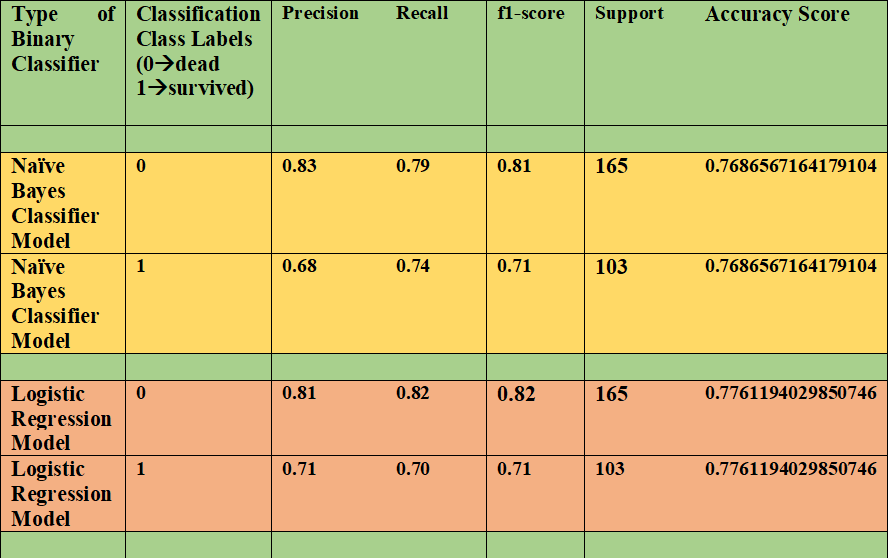

# It can be observed from the above Implementation and Analysis that:

    Accuracy of the Binary Classifier implemented using Naive Bayes Classifier Model : 0.7686567164179104
        
        Accuracy(approximately) = 0.77 
        
    Accuracy of the Binary Classifier implemented using Logistic Regression Model : 0.7761194029850746 
        
        Accuracy(approximately) = 0.78
        
Therefore, it can be inferred that the Logistic Regression Model has higher Accuracy Score of 0.78(approx) that is it has better Accuracy as compared to the Naive Bayes Classifier Model that has Accuracy Score of 0.77(approx) that is of lesser Accuracy.

Thus, the Logistic Regression Model implemented for performing Binary Classification on the Titanic Dataset to find out the count of passengers Survived and Dead has the Highest Accuracy of 0.78(approx) out of the two Models (Naive Bayes Classifier Model and Logistic Regression Model) implemented for performing Binary Classification on the Titanic Dataset. 